# Rain Prediction in Australia 🌦️
## [Kaggle Main Reference](https://www.kaggle.com/code/ahmedbaalash/rain-prediction-in-australia-using-ml-91)
#### Courtesy to Ahmed Baalash

Key variables include:

- Date – Observation date
- Location – Weather station
- MinTemp / MaxTemp – Minimum and maximum temperature
- Rainfall – Amount of rain in mm
- Wind & Humidity – Recorded at 9am and 3pm
- RainToday / RainTomorrow – Binary indicators for rain occurrence

This notebook aims to:

1. Clean and preprocess the data:
    - Handle missing values
    - Convert categorical data to numerical formats
    - Normalize or scale relevant features
1. Explore the dataset:
    - Perform univariate and multivariate analysis
    - Visualize distributions, trends, and correlations
1. Model the data:
    - Predict the target variable: `RainTomorrow`
    - Train and evaluate classification models (e.g., Logistic Regression, Random Forest, etc.)
1. Evaluate model performance using:
    - Accuracy, Precision, Recall, F1-Score, ROC-AUC
  
#### Target Variable
The main target for prediction is:
- `RainTomorrow`: whether it will rain the next day (Yes or No)

This is a binary classification problem, ideal for testing and comparing machine learning models on imbalanced real-world data.

| Column        | Description                                                                 |
|---------------|-----------------------------------------------------------------------------|
| Date          | The calendar date of observation (YYYY-MM-DD format).                       |
| Location      | The weather station location where data was recorded.                       |
| MinTemp       | Minimum temperature (°C) recorded during the day.                           |
| MaxTemp       | Maximum temperature (°C) recorded during the day.                           |
| Rainfall      | Amount of rainfall (mm) recorded in the 24 hours to 9am.                    |
| WindGustDir   | Direction of the strongest wind gust (e.g., N, NE, W).                      |
| WindGustSpeed | Speed (km/h) of the strongest wind gust recorded.                           |
| WindDir9am    | Wind direction at 9am.                                                      |
| WindDir3pm    | Wind direction at 3pm.                                                      |
| WindSpeed9am  | Wind speed (km/h) at 9am.                                                   |
| WindSpeed3pm  | Wind speed (km/h) at 3pm.                                                   |
| Humidity9am   | Relative humidity (%) at 9am.                                               |
| Humidity3pm   | Relative humidity (%) at 3pm.                                               |
| Pressure9am   | Atmospheric pressure (hPa) at 9am.                                          |
| Pressure3pm   | Atmospheric pressure (hPa) at 3pm.                                          |
| Temp9am       | Temperature (°C) at 9am.                                                    |
| Temp3pm       | Temperature (°C) at 3pm.                                                    |
| RainToday     | Whether rainfall was recorded today (Yes/No).                               |
| RainTomorrow  | Target variable: whether rainfall is predicted tomorrow (Yes/No).           |

In [1]:
import os
import numpy as np
import pandas as pd

#### Data Loading & Initial Cleaning

In [2]:
data_df = pd.read_csv(os.path.join('data', 'weatherAUS.csv'))

In [3]:
data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# Drop columns with alot of NaN values
data_df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"], axis=1, inplace = True)
data_df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
data_df = data_df.dropna()

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112925 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           112925 non-null  object 
 1   Location       112925 non-null  object 
 2   MinTemp        112925 non-null  float64
 3   MaxTemp        112925 non-null  float64
 4   Rainfall       112925 non-null  float64
 5   WindGustDir    112925 non-null  object 
 6   WindGustSpeed  112925 non-null  float64
 7   WindDir9am     112925 non-null  object 
 8   WindDir3pm     112925 non-null  object 
 9   WindSpeed9am   112925 non-null  float64
 10  WindSpeed3pm   112925 non-null  float64
 11  Humidity9am    112925 non-null  float64
 12  Humidity3pm    112925 non-null  float64
 13  Pressure9am    112925 non-null  float64
 14  Pressure3pm    112925 non-null  float64
 15  Temp9am        112925 non-null  float64
 16  Temp3pm        112925 non-null  float64
 17  RainToday      112925 non-null  ob

In [9]:
pd.set_option('display.max_columns', None)
data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


#### Date Feature Engineering

The `Date` column is converted to a proper datetime format to enable time-based feature extraction. This helps models capture seasonal patterns or trends.

Steps Covered:
- Convert the Date column to datetime format using `pd.to_datetime`.
- Extract and create three new features:
    - `day`: Day of the month
    - `month`: Month of the year
    - `year`: Year of observation

These additional temporal features can improve model performance by providing context about time-based weather behavior.

In [10]:
data_df["Date"] = pd.to_datetime(data_df["Date"])

In [11]:
data_df["day"] = data_df["Date"].dt.day
data_df["month"] = data_df["Date"].dt.month
data_df["year"] = data_df["Date"].dt.year

#### Correlation Analysis
A heatmap is used to visualize the correlation matrix of all numerical features in the dataset. This helps identify relationships between variables and detect potential multicollinearity.

Purpose:
- Understand how features are linearly related to each other.
- Identify highly correlated variables that may be useful (or redundant) for predictive modeling.

> Correlation values range from -1 (perfect negative) to +1 (perfect positive). A value near 0 indicates little to no linear correlation.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

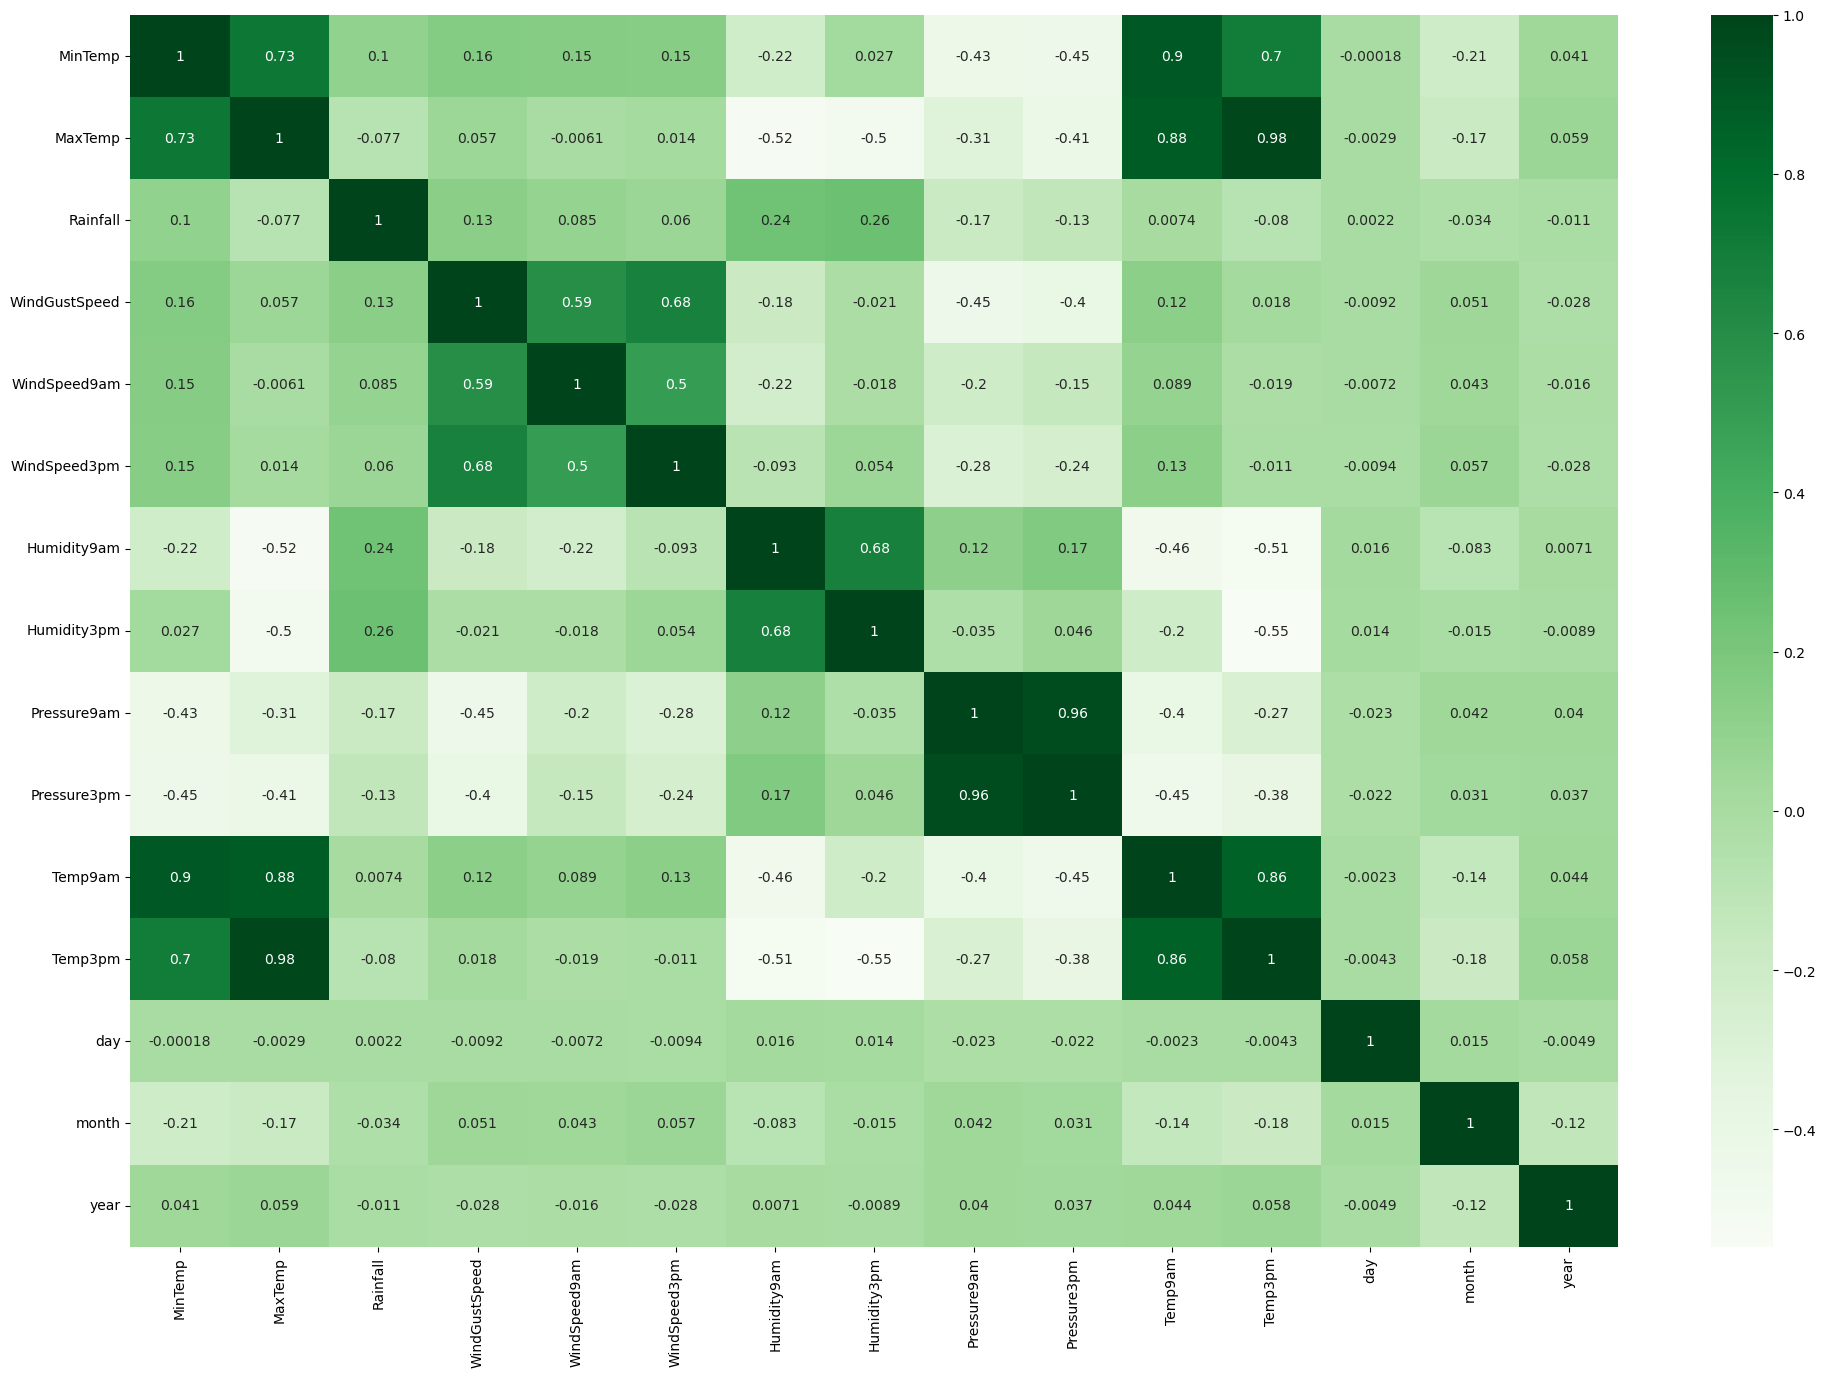

In [13]:
plt.figure(figsize=(24,16))
sns.heatmap(data_df.corr(numeric_only=True),annot=True,cmap="Greens")
plt.show()

#### Outlier Detection & Treatment
To ensure data quality and reduce the impact of extreme values, we analyze and handle outliers in all numerical features.

Step 1: Boxplot Visualization
- The DataFrame is melted into long format to visualize distributions across all numerical columns using boxplots.
- This helps quickly spot features with potential outliers.

Step 2: Outlier Detection (IQR Method)
- The Interquartile Range (IQR) method is used:
    - Q1 (25th percentile) and Q3 (75th percentile) are computed.
    - Outliers are defined as values below `Q1 - 1.5 × IQR` or above `Q3 + 1.5 × IQR`.

Step 3: Outlier Handling
- Instead of removing outliers, values are clipped to the lower and upper IQR bounds.
- This preserves the data structure while limiting the influence of extreme values.

Step 4: Post-Treatment Visualization
- Boxplots are regenerated after clipping to confirm that extreme values have been successfully capped.

This step ensures that outliers won't distort the scale or learning patterns during model training.

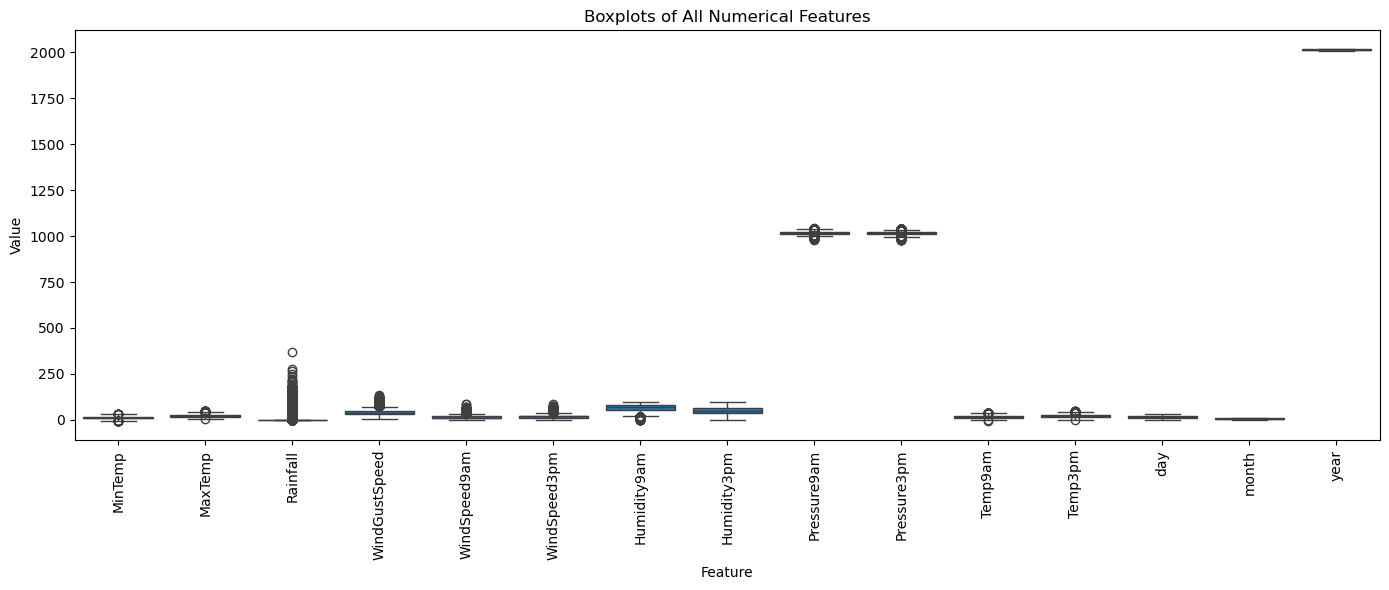

In [14]:
melted_data_df = data_df.select_dtypes(include='number').melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', data=melted_data_df)
plt.xticks(rotation=90)
plt.title("Boxplots of All Numerical Features")
plt.tight_layout()
plt.show()

In [15]:
numeric_data_df = data_df.select_dtypes(include='number')
Q1 = numeric_data_df.quantile(0.25)
Q3 = numeric_data_df.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outliers = (numeric_data_df < (Q1 - 1.5 * IQR)) | (numeric_data_df > (Q3 + 1.5 * IQR))

for col in numeric_data_df.columns:
    Q1 = data_df[col].quantile(0.25)
    Q3 = data_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside IQR bounds
    data_df[col] = data_df[col].clip(lower=lower, upper=upper)

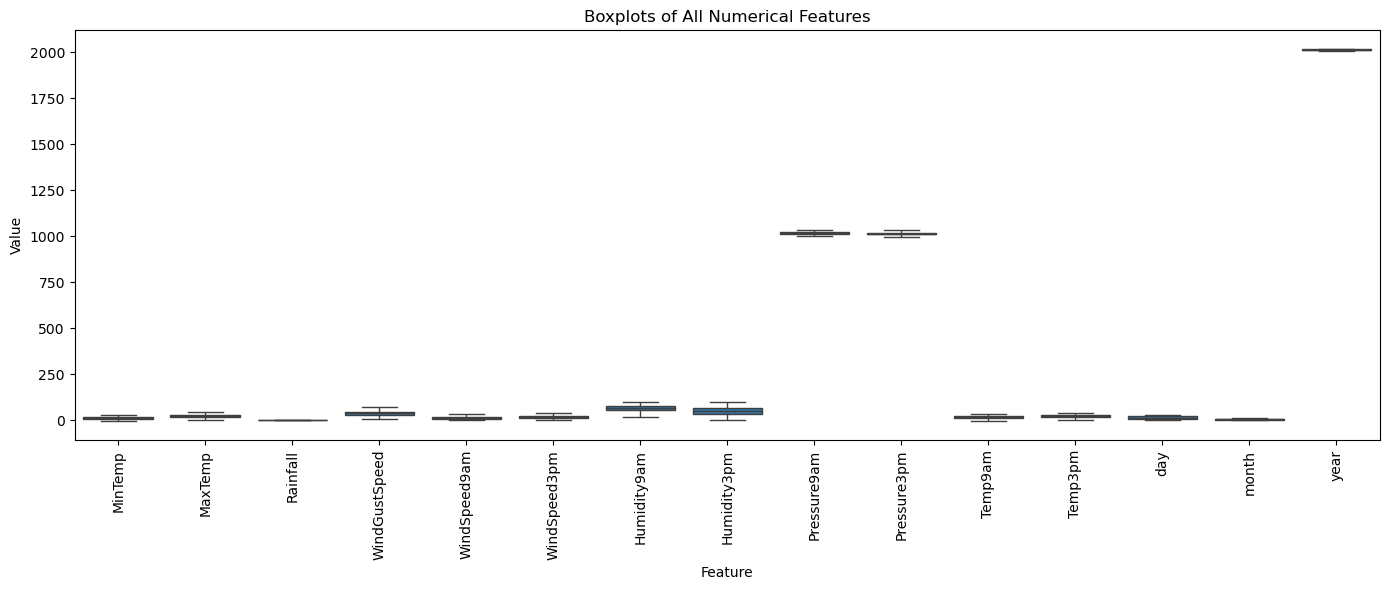

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the DataFrame to long format
melted_data_df = data_df.select_dtypes(include='number').melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(14, 6))
sns.boxplot(x='Feature', y='Value', data=melted_data_df)
plt.xticks(rotation=90)
plt.title("Boxplots of All Numerical Features")
plt.tight_layout()
plt.show()

#### Imbalanced Target variable
- That will be handled when splitting the data using SMOTE

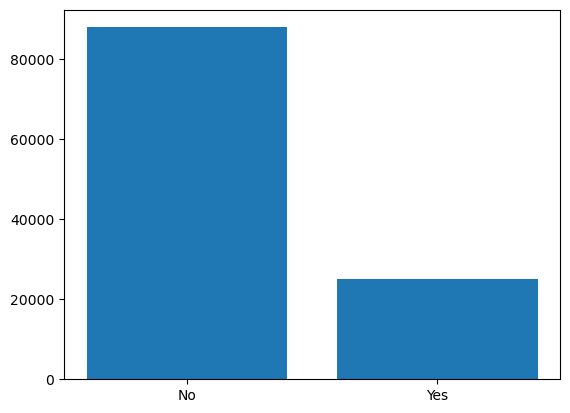

In [17]:
plt.bar(data_df["RainTomorrow"].value_counts().index,data_df["RainTomorrow"].value_counts().values)
plt.show()

#### Wind Direction Encoding (Cyclical Features)
Wind direction variables (`WindGustDir`, `WindDir9am`, `WindDir3pm`) are categorical but cyclical in nature — meaning that the values wrap around (e.g., 0° ≈ 360°). Encoding them as ordinary categories or one-hot vectors loses this important structure.

Step 1: Convert Compass Directions to Angles
A dictionary (direction_to_degrees) maps compass directions (e.g., "N", "SW") to corresponding degree values (0°–360°).

Step 2: Cyclical Encoding
- To preserve the circular nature of wind directions, each angle is transformed into two features:
    - $sin(θ)$ – captures vertical movement.
    - $cos(θ)$ – captures horizontal movement.
This technique ensures that angles like 0° and 360° are treated as close, not distant, values.

Result:
Each wind direction is now represented by a pair of sine and cosine values, enabling models to learn from wind behavior more accurately.

> This approach improves the performance of distance-based and tree-based models by respecting the inherent cyclical structure of directional data.

In [18]:
direction_to_degrees = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

In [19]:
# Convert to angle
data_df['WindGustDir_angle'] = data_df['WindGustDir'].map(direction_to_degrees)
data_df['WindDir9am_angle'] = data_df['WindDir9am'].map(direction_to_degrees)
data_df['WindDir3pm_angle'] = data_df['WindDir3pm'].map(direction_to_degrees)

# Cyclical encoding
data_df['WindGustDir_sin'] = np.sin(np.deg2rad(data_df['WindGustDir_angle']))
data_df['WindGustDir_cos'] = np.cos(np.deg2rad(data_df['WindGustDir_angle']))

data_df['WindDir9am_sin'] = np.sin(np.deg2rad(data_df['WindDir9am_angle']))
data_df['WindDir9am_cos'] = np.cos(np.deg2rad(data_df['WindDir9am_angle']))

data_df['WindDir3pm_sin'] = np.sin(np.deg2rad(data_df['WindDir3pm_angle']))
data_df['WindDir3pm_cos'] = np.cos(np.deg2rad(data_df['WindDir3pm_angle']))

In [20]:
data_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year,WindGustDir_angle,WindDir9am_angle,WindDir3pm_angle,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008,270.0,270.0,292.5,-1.000000,-1.836970e-16,-1.000000,-1.836970e-16,-0.923880,3.826834e-01
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008,292.5,337.5,247.5,-0.923880,3.826834e-01,-0.382683,9.238795e-01,-0.923880,-3.826834e-01
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008,247.5,270.0,247.5,-0.923880,-3.826834e-01,-1.000000,-1.836970e-16,-0.923880,-3.826834e-01
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,4,12,2008,45.0,135.0,90.0,0.707107,7.071068e-01,0.707107,-7.071068e-01,1.000000,6.123234e-17
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,5,12,2008,270.0,67.5,315.0,-1.000000,-1.836970e-16,0.923880,3.826834e-01,-0.707107,7.071068e-01


#### Categorical Feature Encoding

- Dropped the `Location` column due to high cardinality.
- Applied `LabelEncoder` to transform categorical features (`RainToday`, `RainTomorrow`, `day`, `month`, `year`) into numerical form for model compatibility.

In [21]:
from sklearn.preprocessing import LabelEncoder

data_df.drop("Location",axis=1,inplace=True)

categorical_columns = ["RainToday","RainTomorrow","day","month","year"]
le = LabelEncoder()
for i in categorical_columns:
    data_df[i] = le.fit_transform(data_df[i])

#### Feature Scaling
Applied `StandardScaler` to normalize numerical features, ensuring they have a mean of 0 and standard deviation of 1 — which helps models that are sensitive to feature scale.

In [22]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ["MinTemp","Rainfall","MaxTemp","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Temp9am","Temp3pm","Pressure9am","Pressure3pm"]
scaler = StandardScaler()
data_df[numeric_columns] = scaler.fit_transform(data_df[numeric_columns])

#### Data Preparation for Modeling
- Dropped unused or redundant features, including original wind direction columns and the target `RainTomorrow`.
- Separated features (X) and target (Y).
- Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution of the target variable.
- Split the resampled data into training and testing sets using an 80/20 ratio, with stratification to preserve class balance.

In [23]:
X = data_df.drop(["Date","WindGustDir","WindDir9am","WindDir3pm","RainTomorrow","WindGustDir_angle","WindDir9am_angle","WindDir3pm_angle"],axis=1)
Y = data_df["RainTomorrow"]

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X, Y)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_res,Y_res , stratify=Y_res , test_size = 0.2 , random_state= 42)

#### Model Training & Evaluation
Trained and evaluated multiple classification models to predict whether it will rain tomorrow (`RainTomorrow`).

**Models Used**:
- Logistic Regression
- Random Forest Classifier
- K-Nearest Neighbors (KNN)

**Evaluation Process**:
- Each model is trained on the training set and tested on the test set.
- Evaluation metrics include:
    - Accuracy
    - Classification Report (Precision, Recall, F1-Score)
    - Confusion Matrix (visualized using heatmaps)

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "K-Nearest Neighbors" : KNeighborsClassifier()
}

def model_test(name , model):
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    print(f"Model Name : {name}\n")
    print(f"{name}: {round(accuracy * 100 , 2)}%")
    print("-"*50)
    print(classification_report(y_test,pred))
    print("-"*50)
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    print("-"*50)

C:\Users\muhak\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Name : Logistic Regression

Logistic Regression: 79.3%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     17582
           1       0.80      0.78      0.79     17581

    accuracy                           0.79     35163
   macro avg       0.79      0.79      0.79     35163
weighted avg       0.79      0.79      0.79     35163

--------------------------------------------------


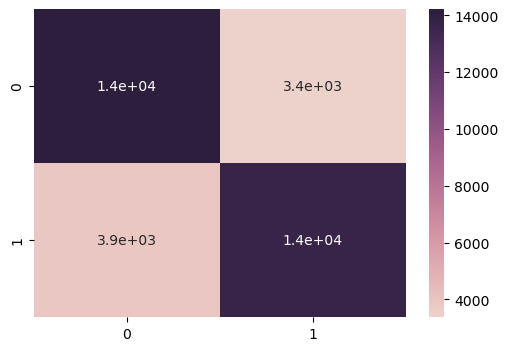

--------------------------------------------------
Model Name : Random Forest Classifier

Random Forest Classifier: 90.98%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     17582
           1       0.91      0.91      0.91     17581

    accuracy                           0.91     35163
   macro avg       0.91      0.91      0.91     35163
weighted avg       0.91      0.91      0.91     35163

--------------------------------------------------


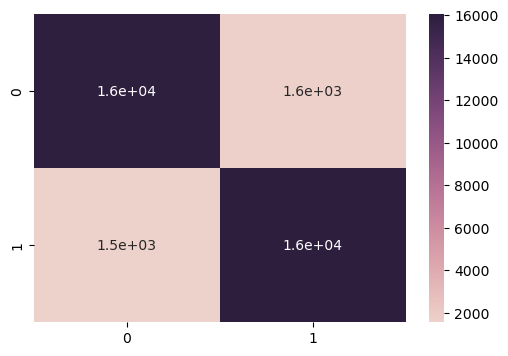

--------------------------------------------------
Model Name : K-Nearest Neighbors

K-Nearest Neighbors: 87.67%
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.79      0.86     17582
           1       0.82      0.97      0.89     17581

    accuracy                           0.88     35163
   macro avg       0.89      0.88      0.88     35163
weighted avg       0.89      0.88      0.88     35163

--------------------------------------------------


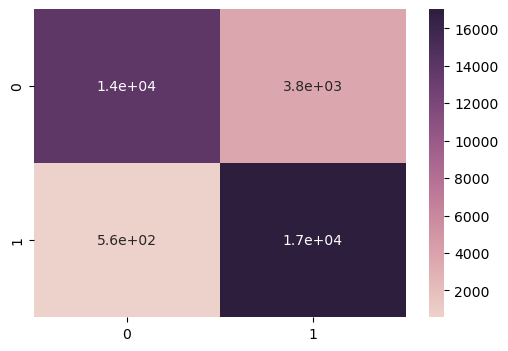

--------------------------------------------------


In [27]:
for model_name , model in models.items():
    model_test(model_name,model)